# Generate Report Results

### 1. 读取3组5台模拟钟组数据，分别为无相关，有3个（135）相关，全相关

In [1]:
# 1. Read data with 0 covariance and 5 covariance
import numpy as np
cov_0_dir = "0-cov.csv"
cov_20_dir = "20-cov.csv"
cov_0_data = np.loadtxt(cov_0_dir, delimiter=',')
cov_20_data = np.loadtxt(cov_20_dir, delimiter=',')
print(cov_0_data)
print(cov_0_data.shape)
print("----------------------------------------")
print(cov_20_data)
print(cov_20_data.shape)

[[ 5.75278662e-14 -1.31278591e-13  9.72410210e-14 ... -9.70478547e-14
  -3.93621874e-15 -8.57965299e-14]
 [ 2.95313729e-14  1.70111720e-15  2.21052195e-14 ...  1.07414471e-14
  -1.31551935e-13  1.21693438e-13]
 [ 8.22785196e-14 -9.94441145e-14  9.89253811e-14 ... -1.09795160e-13
   2.45838602e-14  5.19153241e-15]
 ...
 [ 1.89599327e-14  1.16680382e-13  2.16183112e-13 ... -3.81559739e-16
   2.20485107e-14 -1.62670259e-13]
 [ 4.66666259e-14 -3.23099286e-14  2.11160214e-13 ... -2.04904722e-14
  -1.29647763e-13 -5.36636310e-14]
 [ 4.05390233e-14  1.11716510e-14  8.95139024e-14 ... -3.83313780e-14
   6.95562988e-14 -1.06236976e-13]]
(20, 2591999)
----------------------------------------
[[ 5.68486939e-14 -1.32329590e-13  9.58466110e-14 ... -9.61443653e-14
  -3.42311002e-15 -8.56839000e-14]
 [ 2.88522006e-14  6.50118393e-16  2.07108094e-14 ...  1.16449364e-14
  -1.31038827e-13  1.21806068e-13]
 [ 8.15993473e-14 -1.00495113e-13  9.75309711e-14 ... -1.08891671e-13
   2.50969689e-14  5.30416224

In [2]:
# 2. Modify to get data with 10 clock covariance (1,2,3,4,5) and 5 not (6,7,8,9,10)
num_overall_clocks = 10
stack_list = list()
for i in range(num_overall_clocks):
    if i < num_overall_clocks/2:
        stack_list.append(cov_20_data[i,:])
    else:
        stack_list.append(cov_0_data[i,:])
cov_mix_data = np.stack(stack_list, axis=0)
print(cov_mix_data.shape)

cov_group_1 = cov_mix_data[1:,]
cov_ref_1 = cov_mix_data[0,]
print("group - %s, reference - %s" % (cov_group_1.shape, cov_ref_1.shape))

cov_group_2 = cov_mix_data[:-1,]
cov_ref_2 = cov_mix_data[-1,]
print("group - %s, reference - %s" % (cov_group_2.shape, cov_ref_2.shape))

(10, 2591999)
group - (9, 2591999), reference - (2591999,)
group - (9, 2591999), reference - (2591999,)


In [3]:
# 3. Minus reference group
cov_data_1 = cov_group_1 - cov_ref_1
cov_data_2 = cov_group_2 - cov_ref_2

### 2. 绘制allan方差曲线

In [4]:
# https://allantools.readthedocs.io/en/latest/functions.html
!pip install allantools
import allantools

You should consider upgrading via the 'pip install --upgrade pip' command.


taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [8.79122441e-14 6.23206599e-14 4.40450629e-14 3.11580855e-14
 2.20298749e-14 1.55160723e-14 1.09334318e-14 7.80487852e-15
 5.45344353e-15 3.90219064e-15 2.79501814e-15 1.95946389e-15
 1.53192258e-15 1.32337403e-15 1.45987999e-15 2.00007352e-15
 2.52148102e-15 2.76477310e-15 4.80028536e-15 9.02232993e-15]
----------------------------------------
taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [8.79469884e-14 6.22542704e-14 4.40664563e-14 3.12402488e-14
 2.21128486e-14 1.55268404e-14 1.09033518e-14 7.70104254e-15
 5.56546803

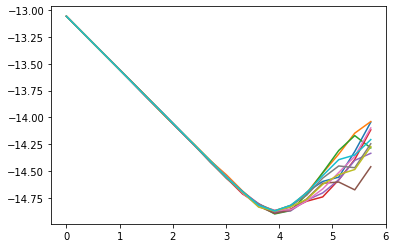

In [5]:
# calculate allan variance for original data
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(cov_mix_data.shape[0]):
    (taus, adevs, errors, ns) = allantools.adev(data=cov_mix_data[i,:], data_type='freq')
    print('taus - %s' % taus)
    print('adevs - %s' % adevs)
    print("----------------------------------------")
    plt.plot(np.log10(taus), np.log10(adevs))

taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [1.24350697e-13 8.80752439e-14 6.23060802e-14 4.40910260e-14
 3.11266743e-14 2.19407201e-14 1.53792799e-14 1.09059985e-14
 7.71291021e-15 5.47906502e-15 3.99286998e-15 2.82996605e-15
 2.10833868e-15 1.90390341e-15 2.21328429e-15 3.04565915e-15
 4.25737584e-15 6.00980892e-15 1.00532702e-14 1.81400936e-14]
----------------------------------------
taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [1.24446204e-13 8.79928457e-14 6.22476655e-14 4.40577317e-14
 3.11543300e-14 2.19292335e-14 1.54548454e-14 1.09962225e-14
 7.62105651

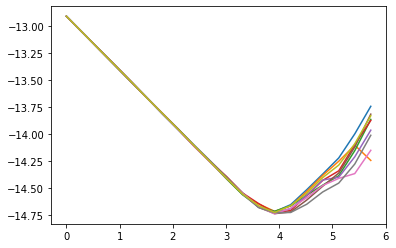

taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [1.24402625e-13 8.80615049e-14 6.22432247e-14 4.40644476e-14
 3.11379431e-14 2.18795999e-14 1.55491576e-14 1.09862446e-14
 7.74708546e-15 5.48359282e-15 3.89214097e-15 2.77935672e-15
 2.16173177e-15 1.87300199e-15 2.16654544e-15 2.82558417e-15
 3.94926235e-15 5.16006863e-15 8.14126274e-15 1.48298412e-14]
----------------------------------------
taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [1.24428075e-13 8.79223372e-14 6.22560416e-14 4.40619338e-14
 3.11801427e-14 2.18949341e-14 1.54798577e-14 1.08753455e-14
 7.83893146

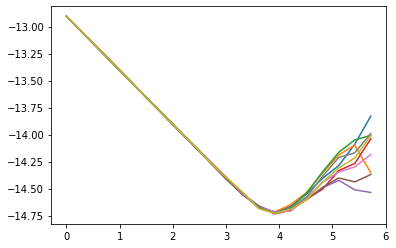

In [6]:
# calculate allan variance for minus data

for i in range(cov_data_1.shape[0]):
    (taus, adevs, errors, ns) = allantools.adev(data=cov_data_1[i,:], data_type='freq')
    print('taus - %s' % taus)
    print('adevs - %s' % adevs)
    print("----------------------------------------")
    plt.plot(np.log10(taus), np.log10(adevs))
plt.show()
    
for i in range(cov_data_2.shape[0]):
    (taus, adevs, errors, ns) = allantools.adev(data=cov_data_2[i,:], data_type='freq')
    print('taus - %s' % taus)
    print('adevs - %s' % adevs)
    print("----------------------------------------")
    plt.plot(np.log10(taus), np.log10(adevs))
plt.show()

### 3. 计算Gamma

#### (1) For each 2 clocks calculate (OPTION)

$ 1/M * \sum_{i=0}^{M}[\Delta y_{A}^{i}(\tau)\Delta y_{B}^{i}(\tau)] $

In [ ]:
# def rolling_diff(arr, tau = 1):
#     # tau should be the power of 2
#     # arr is a one-dimension array
#     if tau >= len(arr):
#         raise Exception('tau %s is bigger or equal than length of array %s ' % (tau, len(arr)))
#     else:
#         result = list()
#         for i in range(len(arr)):
#             if i + tau >= len(arr):
#                 break
#             else:
#                 result.append(arr[i + tau] - arr[i])
#         return np.array(result)

In [ ]:
# def cal_cij_and_plot(cov_data, taus):
#     C_ij_all = list()
#     for tau in taus:
#         delta_clocks = np.apply_along_axis(func1d = rolling_diff, axis = 1, arr = cov_data, tau = tau)
#         print('tau is %s and delta_clocks has shape %s' % (tau, str(delta_clocks.shape)))
#         result = list()
#         for i in range(delta_clocks.shape[0]):
#             for j in range(delta_clocks.shape[0]):
#                 if i < j:
#                     C_ij = np.mean(np.multiply(delta_clocks[i,], delta_clocks[j,]))
#                     result.append(C_ij)
#         C_ij_all.append(result)
    
#     C_ij_all = np.array(C_ij_all)
#     print(C_ij_all)
#     print(C_ij_all.shape)
    
#     for i in range(cov_data.shape[0]):
#         for j in range(cov_data.shape[0]):
#             if i < j:
#                 print("row1: %s, row2: %s" % (i, j))
#                 (taus_i, adevs_i, errors_i, ns_i) = allantools.adev(data=cov_data[i,:], data_type='freq')
#                 (taus_j, adevs_j, errors_j, ns_j) = allantools.adev(data=cov_data[j,:], data_type='freq')
#                 C_ij = C_ij_all[:,i+j-1]
#                 multiply_adev_ij = 2 * adevs_i * adevs_j
#                 Gamma_ij = C_ij / multiply_adev_ij
#                 print('Gamma_ij - %s' % Gamma_ij)
#                 print("----------------------------------------")
#                 plt.plot(np.log10(taus), Gamma_ij)
#             else:
#                 continue

In [ ]:
# taus = 2 ** np.arange(0,20)

In [ ]:
#cal_cij_and_plot(cov_0_data, taus)

In [ ]:
#cal_cij_and_plot(cov_5_data, taus)

#### (2) For each 2 clocks calculate

C(i,j) = Var(i) + Var(j) - Var(i-j), Gamma(i,j) = C(i,j) / (2 * Std(i) * Std(j))

In [7]:
def cal_cij_and_plot2(cov_data):
    for i in range(cov_data.shape[0]):
        for j in range(cov_data.shape[0]):
            if i < j:
                print("row1: %s, row2: %s" % (i, j))
                (taus_i, adevs_i, errors_i, ns_i) = allantools.adev(data=cov_data[i,:], data_type='freq')
                (taus_j, adevs_j, errors_j, ns_j) = allantools.adev(data=cov_data[j,:], data_type='freq')
                (taus_ij, adevs_ij, errors_ij, ns_ij) = allantools.adev(data=cov_data[i,:] - cov_data[j,:], data_type='freq')
                assert taus_i.shape == taus_j.shape == taus_ij.shape
            
                C_ij = adevs_i ** 2 + adevs_j ** 2 - adevs_ij ** 2
                multiply_adev_ij = 2 * adevs_i * adevs_j
                Gamma_ij = C_ij / multiply_adev_ij
            
                print('tau - %s' % taus_ij)
                print('C_ij - %s' % C_ij)
                print('multiply_adev_ij - %s' % multiply_adev_ij)
                print('Gamma_ij - %s' % Gamma_ij)
                print("----------------------------------------")
                plt.plot(np.log10(taus_ij), Gamma_ij)
            else:
                continue

row1: 0, row2: 1
tau - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
C_ij - [1.54779016e-26 7.77258210e-27 3.87778749e-27 1.94212406e-27
 9.67901100e-28 4.81641494e-28 2.37357757e-28 1.20379085e-28
 5.58466366e-29 2.97681546e-29 1.47268168e-29 7.15097344e-30
 4.72167657e-30 3.95949838e-30 5.40367600e-30 1.03688033e-29
 1.76906745e-29 1.53951033e-29 2.63229946e-29 1.73872337e-28]
multiply_adev_ij - [3.09499445e-26 1.54999827e-26 7.75681608e-27 3.88510119e-27
 1.93946137e-27 9.62286348e-28 4.75368784e-28 2.39849572e-28
 1.17561049e-28 5.98877314e-29 3.07619812e-29 1.56136035e-29
 9.46821571e-30 7.30760699e-30 9.53473568e-30 1.78488734e-29
 3.52675403e-29 6.73113132e-29 1.58716567e-28 2.06905795e-28]
Gamma_ij - [0.50009465 0.50145747 0.49992    0.49989021 0.49905665 0.50051785
 0.49931288 0.50

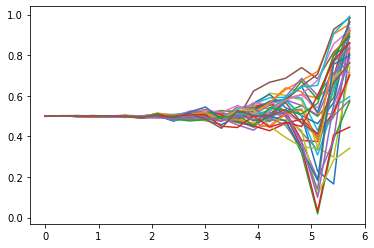

In [8]:
cal_cij_and_plot2(cov_data_1)

row1: 0, row2: 1
tau - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
C_ij - [ 1.54952631e-26  7.72791744e-27  3.86798610e-27  1.93911097e-27
  9.72902948e-28  4.76709833e-28  2.44880045e-28  1.20029906e-28
  6.19771956e-29  3.10353681e-29  1.52290128e-29  7.65581609e-30
  4.70888700e-30  3.57900517e-30  4.84697139e-30  7.21742007e-30
  1.70805289e-29  3.25570904e-29  2.85486347e-29 -8.94460294e-29]
multiply_adev_ij - [3.09583583e-26 1.54851467e-26 7.75003357e-27 3.88312955e-27
 1.94177102e-27 9.58104797e-28 4.81397492e-28 2.38958411e-28
 1.21457744e-28 6.10486508e-29 3.11597544e-29 1.56630501e-29
 9.15196124e-30 7.20141077e-30 9.73902982e-30 1.64850826e-29
 3.49763805e-29 6.69208068e-29 1.29583450e-28 1.31619428e-28]
Gamma_ij - [ 0.50051954  0.49905355  0.49909282  0.49936809  0.50103897  0

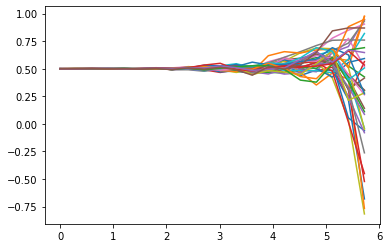

In [9]:
cal_cij_and_plot2(cov_data_2)

#### (3) For each group, calculate harmonic mean

In [10]:
def cal_var_harmonic_mean(cov_group, cov_ref = None):
    var_list = list()
    cov_data = cov_group
    if cov_ref is not None:
        cov_data = cov_group - cov_ref
    for i in range(cov_data.shape[0]):
        (taus_i, adevs_i, errors_i, ns_i) = allantools.adev(data=cov_data[i,:], data_type='freq')
        var_list.append(1.0 / adevs_i ** 2)
    return taus_i, (cov_data.shape[0] / np.sum(var_list, axis=0))

[1.24409064e-13 8.80584663e-14 6.22445476e-14 4.40337313e-14
 3.11109528e-14 2.19399885e-14 1.54832634e-14 1.09942605e-14
 7.71300148e-15 5.50173370e-15 3.92316836e-15 2.79747823e-15
 2.14194947e-15 1.87333259e-15 2.04430906e-15 2.65248309e-15
 3.55855913e-15 4.38612065e-15 6.53615320e-15 9.87207712e-15]


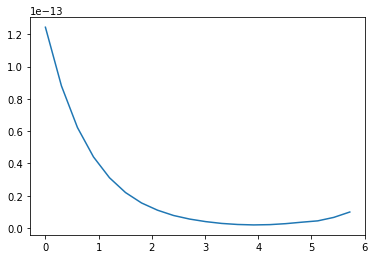

In [11]:
taus, cov_data_1_harmonic = cal_var_harmonic_mean(cov_data_1)
print(np.sqrt(cov_data_1_harmonic))
plt.plot(np.log10(taus), np.sqrt(cov_data_1_harmonic))

[1.24438399e-13 8.80098262e-14 6.22436319e-14 4.40356582e-14
 3.11479019e-14 2.19400669e-14 1.55679110e-14 1.09522438e-14
 7.79767831e-15 5.51289556e-15 3.92467912e-15 2.83317764e-15
 2.13549831e-15 1.88668286e-15 2.07546535e-15 2.64550950e-15
 3.67368822e-15 4.86342498e-15 5.09516827e-15 5.53140175e-15]


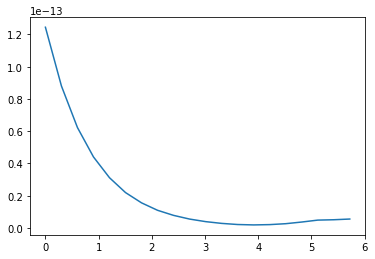

In [12]:
taus, cov_data_2_harmonic = cal_var_harmonic_mean(cov_data_2)
print(np.sqrt(cov_data_2_harmonic))
plt.plot(np.log10(taus), np.sqrt(cov_data_2_harmonic))

### 4. 带入模型进行测试

In [13]:
cov_data = cov_data_1
y_t = cov_data.T
clock_size = y_t.shape[1]

In [16]:
regularization = False
subset_size_list = [3, 5, 9]
window_step_list = [60*60*12, 60*60*6, 60*60, 60*30, 60*10, 60*5]
amplify = [2, 2, 5, 5, 10, 10]

window_size_list = [x*y for (x,y) in zip(window_step_list, amplify)]

------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [8.63838768e-14 6.83058490e-14 4.49168420e-14 2.66858821e-14
 1.84373856e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [8.59948824e-14 6.83914153e-14 4.45919264e-14 2.65633301e-14
 1.73082496e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [8.46146059e-14 6.99271414e-14 4.66607611e-14 2.91084749e-14
 1.81531097e-14]
*** Inverse variance weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [8.27600513e-14 7.05240157e-14 5.13126144e-14 3.23132173e-14
 3.08538125e-14]
*** Each clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [1.07431519e-13 8.58851229e-14 6.02638379e-14 1.92577480e-14
 1.19960123e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.05613863e-13 1.02948308e-13 7.35701266e-14 1.94752137e-14
 2.41847018e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.07921002e-13 1.01099970e-13 6.62473414e-14 3.17425879e-14
 3.19227019e-14]
taus - [

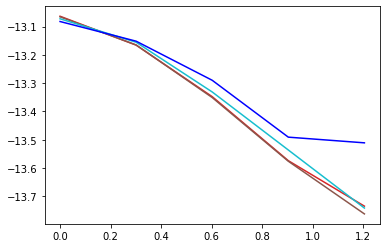

86400 43200
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [8.65993527e-14 6.23692572e-14 3.33512901e-14 2.80217044e-14
 2.51171127e-14 3.28343836e-15]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [8.82391961e-14 6.36174306e-14 3.29927357e-14 2.79030655e-14
 2.48549325e-14 3.38207993e-15]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [8.63724550e-14 6.28015458e-14 3.50159246e-14 2.75434277e-14
 2.43676525e-14 5.01287356e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [8.77418634e-14 6.56973082e-14 5.99999909e-14 2.57257691e-14
 2.04895546e-14 1.59644934e-14]
*** Each clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.35287353e-13 8.73345578e-14 5.58881468e-14 5.73314283e-14
 4.86842921e-14 2.26393400e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.19491823e-13 8.78424158e-14 6.42121510e-14 4.91906477e-14
 2.36417536e-14 1.39612532e-14

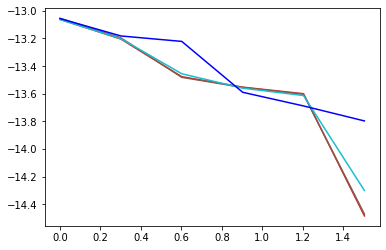

43200 21600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [9.00870397e-14 6.59047450e-14 4.93977195e-14 3.25734070e-14
 2.79095514e-14 1.19100487e-14 1.27410110e-14 3.64222135e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [9.03829536e-14 6.57636381e-14 4.90979812e-14 3.26067531e-14
 2.81751219e-14 1.22895627e-14 1.31871027e-14 3.57807942e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [8.93009938e-14 6.52603107e-14 4.87700126e-14 3.25523804e-14
 2.76234135e-14 1.10084131e-14 1.23311290e-14 4.29686244e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [9.60797862e-14 6.59397820e-14 4.74195254e-14 3.21362896e-14
 1.99812005e-14 1.61439179e-14 1.13406818e-14 1.07859884e-14]
*** Each clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [1.19332275e-13 8.54538178

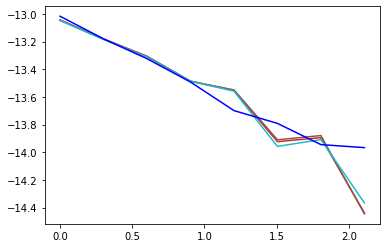

18000 3600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.04426007e-14 6.53137939e-14 4.55204530e-14 3.24203130e-14
 2.31341958e-14 1.63444066e-14 1.48916206e-14 1.29158663e-14
 4.32554689e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.09880882e-14 6.54160654e-14 4.53680835e-14 3.28125942e-14
 2.30987039e-14 1.64467410e-14 1.51213629e-14 1.30994682e-14
 4.06039412e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.00919570e-14 6.47578898e-14 4.53061756e-14 3.23012882e-14
 2.28098677e-14 1.65610843e-14 1.44193238e-14 1.31007513e-14
 5.22462771e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.20530911e-14 6.78887217e-14 4.81606189e-14 3.15015559e-14
 2.18562391e-14 1.30000335e-14 9.16276200e-15 8.91064309e-15
 9.73414366e-15]
*** Each clock's Allan deviation ***
t

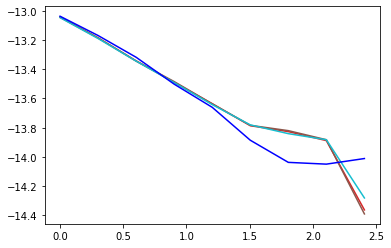

9000 1800
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [9.30564069e-14 6.60969515e-14 4.42262108e-14 3.11393959e-14
 2.21744516e-14 1.57690864e-14 1.14603097e-14 6.34802348e-15
 5.31945058e-15 2.96561913e-15 4.58098340e-15]
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [9.37700960e-14 6.62426810e-14 4.42945147e-14 3.14420563e-14
 2.24502984e-14 1.59023498e-14 1.15654409e-14 6.40511941e-15
 5.23214317e-15 2.98870265e-15 4.38216703e-15]
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [9.25280895e-14 6.57352726e-14 4.40968619e-14 3.12746169e-14
 2.26973393e-14 1.58647440e-14 1.12456584e-14 6.22108958e-15
 4.89512191e-15 3.02042325e-15 4.73186246e-15]
*** Inverse

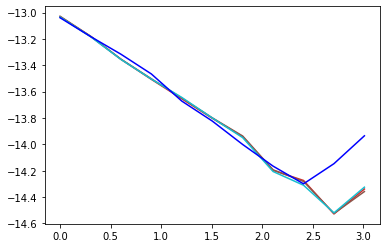

6000 600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03], adevs - [9.28547289e-14 6.57958455e-14 4.61237802e-14 3.14487667e-14
 2.24908605e-14 1.45288122e-14 1.09933176e-14 7.79490122e-15
 4.40449156e-15 3.26771821e-15 4.35805601e-15 2.86902719e-15]
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03], adevs - [9.33878765e-14 6.59692206e-14 4.62120532e-14 3.16612588e-14
 2.26579685e-14 1.48130136e-14 1.10799581e-14 7.77006545e-15
 4.48443331e-15 3.36916271e-15 4.37385576e-15 2.72945783e-15]
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03], adevs - [9.22441078e-14 6.54160219e-14 4.58685935e-14 3.13200184e-14
 2.23877528e-14 1.45197573e-14 1.07201992e-14 7.66219452e-15

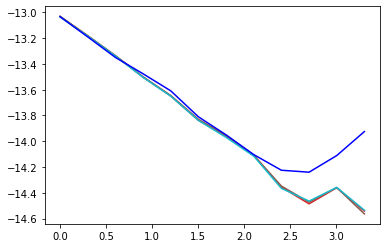

3000 300
Done


In [17]:
import sys

# 0. For each (window_size, window_step) combination
for window_size, window_step in zip(window_size_list, window_step_list):
    
    if window_size > y_t.shape[0]:
        raise Exception('The window size should not be greater than the number of time points')

    all_weighted_clock_estimation = list()
        
    # 1. For each subset_size
    for subset_size in subset_size_list:
        if subset_size > clock_size:
            raise Exception('The subset size should not be greater than the number of clocks')
        A = np.ones((subset_size, 1))
            
        weighted_inverse_variance_estimation = list()
        weighted_clock_estimation = list()
#         print("------------------Subset size %s------------------" % subset_size)
        
        # 2. For each rolling window
        for i in range(int((y_t.shape[0] - window_size) / window_step) + 1):
            subset_cov_list = list()
            subset_raw_list = list()
#             print("------------------Step %s------------------" % i)
                
            # 3. For each subset
            for j in range(clock_size - subset_size + 1):
                
                # 4. Get raw subset
                subset_raw = y_t[i:i+window_size, j:j+subset_size]
        
                # 5. Calculate covariance within the subset
                subset_cov = np.cov(subset_raw, rowvar=False)
                subset_cov_list.append(subset_cov)
#                 print("*** Subset Cov ***")
#                 print(subset_cov)
                
                # 6. Calculate summation for corresponding clocks in different subsets 
                subset_raw_list.append(subset_raw)

            # 7. Calculate covariance matrix mean (Element-wise)
            allset_cov_mean = np.sum(np.asarray(subset_cov_list), axis=0) / (clock_size - subset_size + 1)
#             print("*** Cov mean ***")
#             print(allset_cov_mean)
    
            # 8. Add regularization term
            if regularization:
                sigma = np.max(allset_cov_mean) / (clock_size * 10.0)
                allset_cov_mean += sigma * np.eye(subset_size)
#                 print("*** Regularization term ***")
#                 print(sigma * np.eye(subset_size))
    
            # 9. Calculate the inverse of covariance matrix mean
            allset_cov_mean_inverse = np.linalg.inv(allset_cov_mean)
#             print("*** Inverse Cov mean ***")
#             print(allset_cov_mean_inverse)
    
            # 10. Calculate weight
            weight = np.dot(allset_cov_mean_inverse, A) / np.dot(np.dot(A.T, allset_cov_mean_inverse), A)
#             print("*** Weight ***")
#             print(weight)

            # 11. Calculate beamformer weighted clock
            subset_corresponding_sum = np.sum(subset_raw_list, axis=0).T
            Z = (np.dot(weight.T, subset_corresponding_sum) / (clock_size - subset_size + 1))[0]
#             print("*** Weighted output ***")
#             print(Z)
    
            # 12. Select the last element in Z as the estimation of weighted clock
            weighted_clock_estimation.append(Z[-1])
    
            # 13. Calculate allan variance for each clock
            inverse_variance = list()
            clock_last_row = list()
            for k in range(clock_size):
                clock = y_t[window_step * i:window_step * i + window_size + 1, k]
                (taus, adevs, errors, ns) = allantools.adev(data=clock, data_type='freq')
                inverse_variance.append(1.0 / (adevs[7] ** 2)) # using allan variance for tau = 2^8
                clock_last_row.append(clock[-1])
            inverse_variance = np.array(inverse_variance) / np.sum(np.array(inverse_variance))
#            print("*** Inverse variance weight ***")
#            print(inverse_variance)
    
            # 14. Calculate the inverse variance weighted clock
            weighted_inverse_variance_clock = np.dot(inverse_variance, np.array(clock_last_row))
            weighted_inverse_variance_estimation.append(weighted_inverse_variance_clock)
#            print("*** Inverse variance weighted clock ***")
#            print(weighted_inverse_variance_clock)
                
        all_weighted_clock_estimation.append(weighted_clock_estimation)

    # 15. Visualize weighted clock estimation and each clock
    print("------------------Overall------------------")
    '''
    print("*** Weighted clock estimation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        print("+++ Subset size = %s +++" % subset_size)
        print(weighted_clock_estimation)

    print("*** Inverse variance weighted clock estimation ***")
    print(weighted_inverse_variance_estimation)
    '''
    # 16. Calculate Allan deviation
    fig = plt.figure(facecolor='white')
        
    print("*** Weighted clock's Allan deviation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        (taus, adevs, errors, ns) = allantools.adev(data=weighted_clock_estimation, data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
        color = 'C%s' % subset_size
        plt.plot(np.log10(taus), np.log10(adevs), color=color)

    print("*** Inverse variance weighted clock's Allan deviation ***")
    (taus, adevs, errors, ns) = allantools.adev(data=weighted_inverse_variance_estimation, data_type='freq')
    print('taus - %s, adevs - %s' % (taus, adevs))
    plt.plot(np.log10(taus), np.log10(adevs), color='blue')

    print("*** Each clock's Allan deviation ***")
    real_clock = y_t[-(int((y_t.shape[0] - window_size) / window_step) + 1):,]
    for i in range(real_clock.shape[1]):
        (taus, adevs, errors, ns) = allantools.adev(data=real_clock[:,i], data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
            
    plt.show()
    print(window_size, window_step)

print('Done')

In [18]:
cov_data = cov_data_2
y_t = cov_data.T
clock_size = y_t.shape[1]

In [19]:
regularization = False
subset_size_list = [3, 5, 9]
window_step_list = [60*60*12, 60*60*6, 60*60, 60*30, 60*10, 60*5]
amplify = [2, 2, 5, 5, 10, 10]

window_size_list = [x*y for (x,y) in zip(window_step_list, amplify)]

------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [9.48232541e-14 8.56415551e-14 5.90712593e-14 2.80846287e-14
 2.14884134e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [9.45690297e-14 8.57356568e-14 5.81476493e-14 2.96713860e-14
 2.19594915e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [9.42779287e-14 8.78121239e-14 6.04167410e-14 2.90335808e-14
 2.33273210e-14]
*** Inverse variance weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [8.50621969e-14 7.25215757e-14 5.20500952e-14 3.25856565e-14
 4.44622584e-14]
*** Each clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [1.23297206e-13 8.67358750e-14 4.98194652e-14 3.14414443e-14
 3.84654648e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.29648493e-13 8.79202784e-14 4.81890967e-14 3.16080407e-14
 4.77275198e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.17370504e-13 7.72178500e-14 5.98683612e-14 2.92105543e-14
 1.62162893e-14]
taus - [

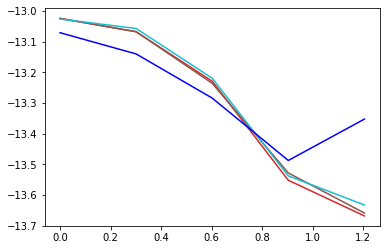

86400 43200
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [8.77550455e-14 5.57804430e-14 3.40639328e-14 2.51289940e-14
 1.57776443e-14 1.37694427e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [8.84213279e-14 5.57455403e-14 3.37984028e-14 2.50041391e-14
 1.50857210e-14 1.35603538e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [8.60094604e-14 5.58577550e-14 3.22062917e-14 2.42977828e-14
 1.74015974e-14 1.29170783e-14]
*** Inverse variance weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.05327177e-13 6.42956533e-14 4.12513801e-14 3.19079267e-14
 6.96882929e-15 9.37486309e-15]
*** Each clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.25088312e-13 7.91264679e-14 5.77628136e-14 4.58437622e-14
 2.28644650e-14 1.74395999e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.22662552e-13 8.58406948e-14 5.32180622e-14 4.67549808e-14
 3.57861274e-14 2.47581854e-14

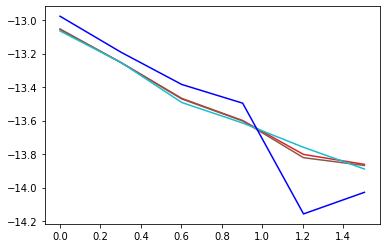

43200 21600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [9.74165843e-14 6.72773191e-14 4.53906286e-14 3.16489698e-14
 2.36135674e-14 1.35783652e-14 8.12383840e-15 1.71376656e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [9.77437351e-14 6.73873889e-14 4.56860227e-14 3.17486973e-14
 2.39631603e-14 1.34446747e-14 8.45305251e-15 2.35386376e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [9.71359632e-14 6.69878822e-14 4.43702030e-14 3.09282238e-14
 2.32772050e-14 1.32953173e-14 7.74210993e-15 1.27206674e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [8.92990905e-14 6.62635821e-14 4.57055245e-14 3.07166413e-14
 2.30690936e-14 1.53661158e-14 6.31824273e-15 5.51599680e-15]
*** Each clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [1.22478972e-13 8.54789817

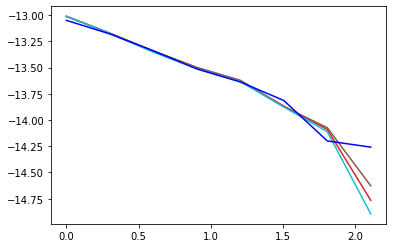

18000 3600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.28687717e-14 6.33440398e-14 4.35162497e-14 3.04898482e-14
 2.67938989e-14 1.69639877e-14 1.38158614e-14 1.07148707e-14
 9.06510892e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.33880081e-14 6.38817795e-14 4.35353093e-14 3.09421207e-14
 2.70863802e-14 1.70068455e-14 1.40001167e-14 1.08528716e-14
 9.18285767e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.23343040e-14 6.28648125e-14 4.30093779e-14 3.01592320e-14
 2.62505125e-14 1.71766414e-14 1.37236214e-14 1.02227035e-14
 7.97195219e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.12185859e-14 6.18242647e-14 4.39195425e-14 3.21837980e-14
 2.02529006e-14 1.55194074e-14 1.14545766e-14 5.72747699e-15
 4.03144465e-15]
*** Each clock's Allan deviation ***
t

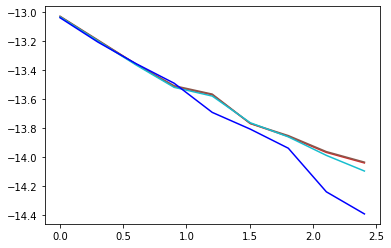

9000 1800
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [9.14904774e-14 6.50571922e-14 4.65845009e-14 3.10133606e-14
 2.31201195e-14 1.57767281e-14 1.05141632e-14 8.10275005e-15
 5.62855185e-15 3.63638613e-15 4.41626499e-15]
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [9.18411006e-14 6.54281310e-14 4.64345743e-14 3.11910850e-14
 2.31563477e-14 1.59041117e-14 1.05660198e-14 8.13358558e-15
 5.68674201e-15 3.57303614e-15 4.41290617e-15]
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [9.11938925e-14 6.44798001e-14 4.62544515e-14 3.06933908e-14
 2.30881252e-14 1.58359686e-14 1.05108742e-14 7.95788311e-15
 5.36873999e-15 3.52119337e-15 4.16566971e-15]
*** Inverse

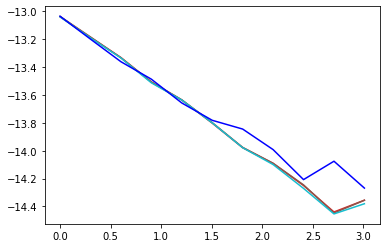

6000 600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03], adevs - [9.28206999e-14 6.53083093e-14 4.78601999e-14 3.20387591e-14
 2.39170851e-14 1.75037719e-14 1.04290609e-14 8.22128463e-15
 6.04655339e-15 4.01427701e-15 3.02838956e-15 3.77735895e-15]
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03], adevs - [9.32300414e-14 6.56459005e-14 4.78555329e-14 3.21833276e-14
 2.39990755e-14 1.75775893e-14 1.04719047e-14 8.47366555e-15
 6.14728240e-15 4.06577191e-15 2.98341056e-15 3.72534083e-15]
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03], adevs - [9.22187105e-14 6.47370471e-14 4.73775508e-14 3.17499809e-14
 2.37415527e-14 1.73886114e-14 1.05565937e-14 7.94385512e-15

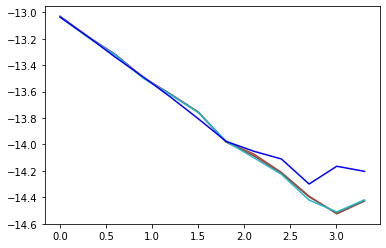

3000 300
Done


In [20]:
import sys

# 0. For each (window_size, window_step) combination
for window_size, window_step in zip(window_size_list, window_step_list):
    
    if window_size > y_t.shape[0]:
        raise Exception('The window size should not be greater than the number of time points')

    all_weighted_clock_estimation = list()
        
    # 1. For each subset_size
    for subset_size in subset_size_list:
        if subset_size > clock_size:
            raise Exception('The subset size should not be greater than the number of clocks')
        A = np.ones((subset_size, 1))
            
        weighted_inverse_variance_estimation = list()
        weighted_clock_estimation = list()
#         print("------------------Subset size %s------------------" % subset_size)
        
        # 2. For each rolling window
        for i in range(int((y_t.shape[0] - window_size) / window_step) + 1):
            subset_cov_list = list()
            subset_raw_list = list()
#             print("------------------Step %s------------------" % i)
                
            # 3. For each subset
            for j in range(clock_size - subset_size + 1):
                
                # 4. Get raw subset
                subset_raw = y_t[i:i+window_size, j:j+subset_size]
        
                # 5. Calculate covariance within the subset
                subset_cov = np.cov(subset_raw, rowvar=False)
                subset_cov_list.append(subset_cov)
#                 print("*** Subset Cov ***")
#                 print(subset_cov)
                
                # 6. Calculate summation for corresponding clocks in different subsets 
                subset_raw_list.append(subset_raw)

            # 7. Calculate covariance matrix mean (Element-wise)
            allset_cov_mean = np.sum(np.asarray(subset_cov_list), axis=0) / (clock_size - subset_size + 1)
#             print("*** Cov mean ***")
#             print(allset_cov_mean)
    
            # 8. Add regularization term
            if regularization:
                sigma = np.max(allset_cov_mean) / (clock_size * 10.0)
                allset_cov_mean += sigma * np.eye(subset_size)
#                 print("*** Regularization term ***")
#                 print(sigma * np.eye(subset_size))
    
            # 9. Calculate the inverse of covariance matrix mean
            allset_cov_mean_inverse = np.linalg.inv(allset_cov_mean)
#             print("*** Inverse Cov mean ***")
#             print(allset_cov_mean_inverse)
    
            # 10. Calculate weight
            weight = np.dot(allset_cov_mean_inverse, A) / np.dot(np.dot(A.T, allset_cov_mean_inverse), A)
#             print("*** Weight ***")
#             print(weight)

            # 11. Calculate beamformer weighted clock
            subset_corresponding_sum = np.sum(subset_raw_list, axis=0).T
            Z = (np.dot(weight.T, subset_corresponding_sum) / (clock_size - subset_size + 1))[0]
#             print("*** Weighted output ***")
#             print(Z)
    
            # 12. Select the last element in Z as the estimation of weighted clock
            weighted_clock_estimation.append(Z[-1])
    
            # 13. Calculate allan variance for each clock
            inverse_variance = list()
            clock_last_row = list()
            for k in range(clock_size):
                clock = y_t[window_step * i:window_step * i + window_size + 1, k]
                (taus, adevs, errors, ns) = allantools.adev(data=clock, data_type='freq')
                inverse_variance.append(1.0 / (adevs[7] ** 2)) # using allan variance for tau = 2^8
                clock_last_row.append(clock[-1])
            inverse_variance = np.array(inverse_variance) / np.sum(np.array(inverse_variance))
#            print("*** Inverse variance weight ***")
#            print(inverse_variance)
    
            # 14. Calculate the inverse variance weighted clock
            weighted_inverse_variance_clock = np.dot(inverse_variance, np.array(clock_last_row))
            weighted_inverse_variance_estimation.append(weighted_inverse_variance_clock)
#            print("*** Inverse variance weighted clock ***")
#            print(weighted_inverse_variance_clock)
                
        all_weighted_clock_estimation.append(weighted_clock_estimation)

    # 15. Visualize weighted clock estimation and each clock
    print("------------------Overall------------------")
    '''
    print("*** Weighted clock estimation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        print("+++ Subset size = %s +++" % subset_size)
        print(weighted_clock_estimation)

    print("*** Inverse variance weighted clock estimation ***")
    print(weighted_inverse_variance_estimation)
    '''
    # 16. Calculate Allan deviation
    fig = plt.figure(facecolor='white')
        
    print("*** Weighted clock's Allan deviation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        (taus, adevs, errors, ns) = allantools.adev(data=weighted_clock_estimation, data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
        color = 'C%s' % subset_size
        plt.plot(np.log10(taus), np.log10(adevs), color=color)

    print("*** Inverse variance weighted clock's Allan deviation ***")
    (taus, adevs, errors, ns) = allantools.adev(data=weighted_inverse_variance_estimation, data_type='freq')
    print('taus - %s, adevs - %s' % (taus, adevs))
    plt.plot(np.log10(taus), np.log10(adevs), color='blue')

    print("*** Each clock's Allan deviation ***")
    real_clock = y_t[-(int((y_t.shape[0] - window_size) / window_step) + 1):,]
    for i in range(real_clock.shape[1]):
        (taus, adevs, errors, ns) = allantools.adev(data=real_clock[:,i], data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
            
    plt.show()
    print(window_size, window_step)

print('Done')